<h1>All Respondents Analysis with Grades</h1>

<h2>Read All Respondents Data</h2>

In [34]:
import os
import pandas as pd

# Specify the folder path where the CSV files are located
folder_path = "../all respondents data"


# Initialize an empty dataframe to store the combined data
combined_data = pd.DataFrame()

# Loop through each file in the folder with .csv extension and append to the combined_data dataframe
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, low_memory=False)
        respondent_num = filename.split('_')[0]  # Get the first part of the filename before the first '_'
        df['Respondent'] = respondent_num  # Add a new column with the respondent number
        combined_data = pd.concat([combined_data, df])

columns_to_remove = ['Row','Timestamp','EventSource','SlideEvent','StimType','Duration',
                     'CollectionPhase','SourceStimuliName','EventSource','SampleNumber','EventSource.1',
                     'Blink', 'BlinkRate', 'EventSource.2', 'ET_TimeSignal', 'EventSource.3']
combined_data.drop(columns_to_remove, axis=1, inplace=True)

# Print the combined data
# print(combined_data)


In [35]:
import pandas as pd

# Read in the Grades.csv file
grades_df = pd.read_csv('Grades.csv')

# Remove the trailing underscore from the "Respondent" column in the grades_df dataframe
grades_df['Respondent'] = grades_df['Respondent'].str.rstrip('_')

# Merge the combined_data and grades_df dataframes based on the "Respondent" column
combined_data_with_grades = pd.merge(combined_data, grades_df[['Respondent', 'Grade']], on='Respondent')

# Print the resulting dataframe with the added "Grade" column
# print(combined_data_with_grades)


<h2>Facial Expressions Analysis</h2>

<h3>Data Pre-processing</h3>

In [36]:
import pandas as pd

facial_expressions_columns = ['Respondent', 'Grade','Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw',
       'Roll']
# Creating a copy df with only the facial expressions data
facial_expressions_data = combined_data_with_grades[facial_expressions_columns].copy()

# Remove rows with all NaN values, except in the 'Respondent' column
facial_expressions_data = facial_expressions_data.dropna(how='all', 
                                                         subset=facial_expressions_data.columns.difference(['Respondent', 'Grade']))

facial_expressions_data.tail()



,Respondent,Grade,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Pitch,Yaw,Roll
1479598,019,55,0.139795,0.183797,0.026397,0.130016,0.045364,0.117328,0.060181,0.328766,...,0.125971,2.270765,6.647667,0.457276,4.720551,2.773993,0.106491,1.251196,-1.319161,-0.530024
1479600,019,55,0.153553,0.176831,0.026905,0.128566,0.046042,0.116635,0.058846,0.328766,...,0.129171,4.729377,6.861856,0.512176,4.703412,2.382556,0.255912,0.392811,-1.608518,-0.468374
1479602,019,55,0.168653,0.193708,0.027669,0.130344,0.045429,0.117382,0.058326,0.328766,...,0.135208,6.785742,7.472722,0.519497,4.585781,3.149543,0.253990,0.286135,-1.387060,-0.229705
1479604,019,55,0.195341,0.187637,0.027562,0.130503,0.043328,0.117269,0.057809,0.328766,...,0.135131,10.632483,7.365998,0.463937,4.418400,2.717841,0.150040,-1.702013,-1.998969,-0.185392
1479605,019,55,0.245047,0.204197,0.028027,0.133038,0.041089,0.118906,0.057576,0.328766,...,0.144891,16.228485,7.659717,0.376117,4.076993,3.261096,0.070152,-0.172043,-1.711222,-0.415041


<h2>Compare Facial Expressions by Grade Group</h2>

In [46]:

from tabulate import tabulate

# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
facial_expressions_data['Grade Group'] = facial_expressions_data['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')

# Describe statistics for each selected column by grade group
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']

# Group the data by the respondent ID and randomly select 5000 observations from each group
# sampled_data = facial_expressions_data.groupby('Respondent').apply(lambda x: x.sample(n=5000))

sample_data = facial_expressions_data


ValueError: Cannot take a larger sample than population when 'replace=False'

<h3>Save Dataset to File</h3>

In [38]:
import datetime

# Get current date and time as string
now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define filename with timestamp
filename = f"sampled_data_few_respondents{now}.csv"

# Save sampled_data to file
sampled_data.to_csv('C:\\projects\\classifiers\\grade groups model\\models data and pickles\\' + filename, index=False)


<h2>Random Forest with Data Split by Respondent</h3>

In [39]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# Select only some features
datatset = sampled_data[selected_columns + ['Grade Group', 'Respondent']]

# Split the data into training and testing sets
X = datatset.drop('Grade Group', axis=1)
y = datatset['Grade Group']

# Split the data based on respondent ID
group_split = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(group_split.split(X, y, groups=datatset["Respondent"]))

# Split the data into training and test sets
X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the classifier on the test set
accuracy = rf.score(X_test, y_test)
print("Test accuracy:", accuracy)


Test accuracy: 0.2511


ValueError: Found input variables with inconsistent numbers of samples: [20000, 16000]

In [45]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

# Evaluate the model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate TPR, FPR, TNR, FNR
tnr = tn / (tn + fp)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print('FPR: ', fpr)
print('TPR: ', tpr)
print('FNR: ', fnr)
print('TNR: ', tnr)

(60000, 12)
(60000,)
(20000,)
(16000,)


ValueError: Found input variables with inconsistent numbers of samples: [20000, 16000]

<h3>Feature Importance</h3>

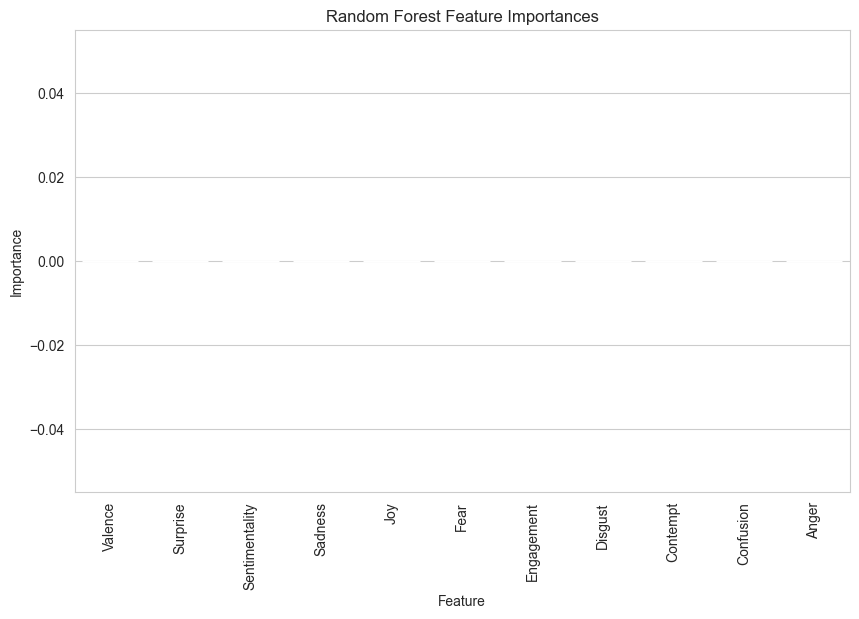

In [42]:
# Get the feature importances
importances = clf.feature_importances_
features = X.columns

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, features), reverse=True)

# Extract the sorted feature importances and feature names
sorted_feature_importances = [x[0] for x in sorted_importances]
sorted_feature_names = [x[1] for x in sorted_importances]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_names, y=sorted_feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()